# Support Vector Machines (SVM)

## Ejercicio 1: Autenticidad de Billete - Bill Authentication

### Importar Librerías y Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
data_bill = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databasets/bill_authentication.csv", encoding='utf-8')

### Conocer los elementos de la data

In [ ]:
data_bill.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
data_bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


### Graficar la Data

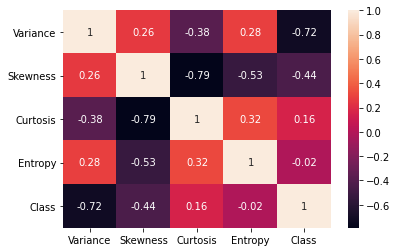

In [ ]:
corr_matrix = data_bill.corr().round(2)
sns.heatmap(corr_matrix, annot=True)

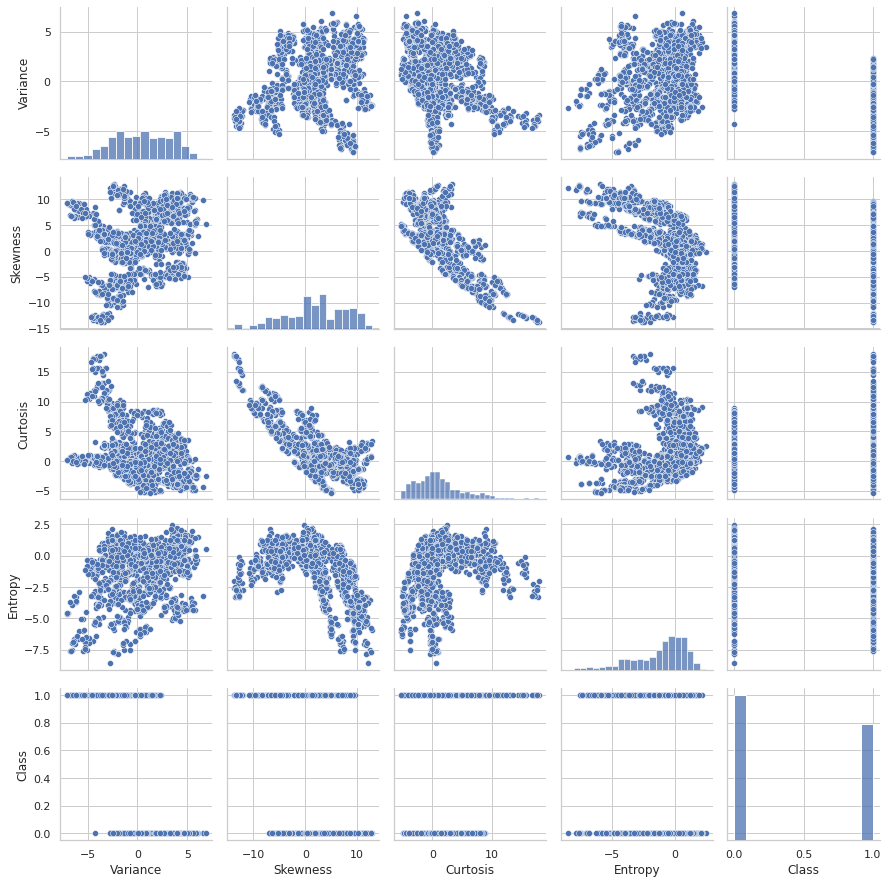

In [ ]:
sns.set(style='whitegrid', context='notebook')
plot_data = data_bill.columns
sns.pairplot(data_bill[plot_data])
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

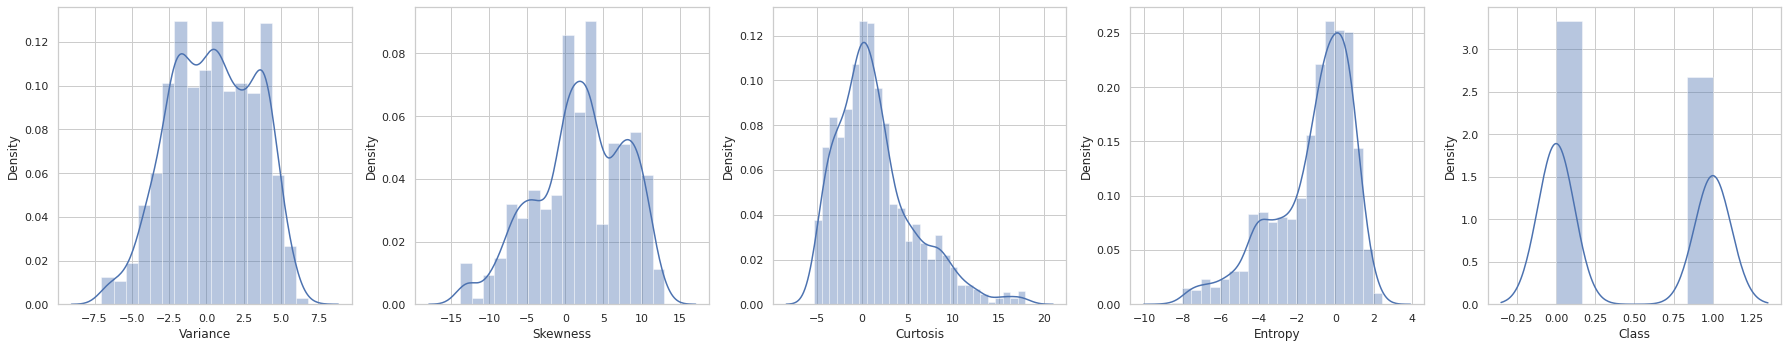

In [ ]:
cols = 5

fig, ax = plt.subplots(ncols=cols, figsize=(25,5))

col = data_bill.columns
index = 0

for i in range(cols):
  sns.distplot(data_bill[col[index]], ax=ax[i])
  index += 1

plt.tight_layout()

### Separar la Data

In [ ]:
X = data_bill.drop('Class', axis=1)
y = data_bill['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Instanciar el algoritmo y entrenar

Existen varios tipos de kernel:

- ‘linear’ (2 grupos)
- ‘sigmoid’ (clasificaciones binarias)
- ‘poly’ (varios grupos)
- ‘rbf’ ( separación por grupo tipo k-means)
- ‘precomputed’

In [ ]:
svm = SVC(kernel='linear')

svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Realizar predicciones

In [ ]:
y_pred = svm.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print('Accuracy bill authentication SMV : '+ str(accuracy*100))

Accuracy bill authentication SMV : 98.83381924198251


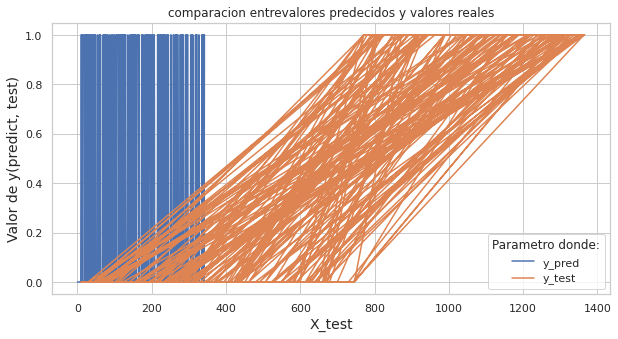

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(y_pred, label='y_pred')
plt.plot(y_test, label='y_test')

plt.xlabel('X_test', fontsize=14)
plt.ylabel('Valor de y(predict, test)', fontsize=14)

plt.title('comparacion entrevalores predecidos y valores reales')
plt.legend(title='Parametro donde:')

plt.show()